# Airbnb Dataset cleaning


## Import Libraries and Load the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-2-896a701356fc>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [6]:
data.shape

(102599, 26)

<Axes: >

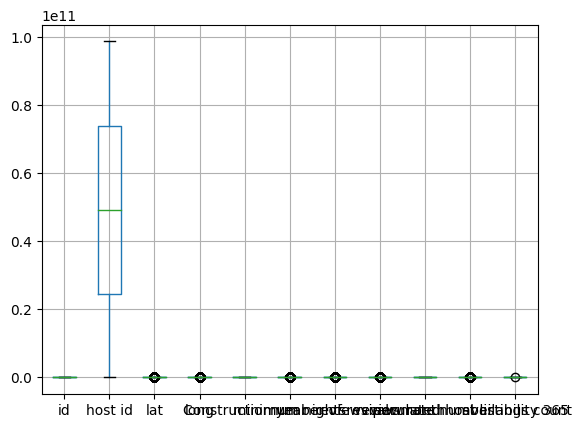

In [7]:
data.boxplot()

## Data Cleaning

In [8]:
#Checking for missing values in data
data.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


drop(columns_tolist, axis=1, inplace=True)

In [9]:
#Drop unwanted columns
data.drop(['license'], axis=1, inplace=True)

In [10]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [11]:
data['NAME']= data['NAME'].fillna('None')

In [12]:
data['NAME']

,NAME
0,Clean & quiet apt home by the park
1,Skylit Midtown Castle
2,THE VILLAGE OF HARLEM....NEW YORK !
3,None
4,Entire Apt: Spacious Studio/Loft by central park
...,...
102594,Spare room in Williamsburg
102595,Best Location near Columbia U
102596,"Comfy, bright room in Brooklyn"
102597,Big Studio-One Stop from Midtown


In [13]:
data['lat'].describe()

,lat
count,102591.000000
mean,40.728094
std,0.055857
min,40.499790
25%,40.688740
50%,40.722290
75%,40.762760
max,40.916970


In [14]:
data['lat'] = data['lat'].fillna(data['lat'].mean())

In [15]:
data.lat

,lat
0,40.64749
1,40.75362
2,40.80902
3,40.68514
4,40.79851
...,...
102594,40.70862
102595,40.80460
102596,40.67505
102597,40.74989


In [16]:
data['host_identity_verified'].value_counts()

,count
host_identity_verified,
unconfirmed,51200
verified,51110


In [17]:
data['host_identity_verified'].mode()

,host_identity_verified
0,unconfirmed


In [18]:
data['host_identity_verified'] = data['host_identity_verified'].fillna(data['host_identity_verified'].mode()[0])

In [19]:
data['neighbourhood group']

,neighbourhood group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
102594,Brooklyn
102595,Manhattan
102596,Brooklyn
102597,Queens


In [20]:
data['neighbourhood group'].isnull().sum()

29

In [21]:
data['host name'].value_counts()

,count
host name,
Michael,881
David,764
John,581
Alex,546
Sonder (NYC),516
...,...
Carly & Sebastian,1
Soph,1
Anshu,1


In [22]:
data['host name'] = data['host name'].fillna('None')

In [23]:
data['host name']

,host name
0,Madaline
1,Jenna
2,Elise
3,Garry
4,Lyndon
...,...
102594,Krik
102595,Mifan
102596,Megan
102597,Christopher


In [24]:
data['host name'].isnull().sum()

0

In [25]:
data['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


In [26]:
data['neighbourhood group'] = data['neighbourhood group'].fillna(data['neighbourhood group'].mode()[0])

In [27]:
data['neighbourhood group']

,neighbourhood group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
102594,Brooklyn
102595,Manhattan
102596,Brooklyn
102597,Queens


In [28]:
data['neighbourhood group'].isnull().sum()

0

In [29]:
data['long'].describe()

,long
count,102591.000000
mean,-73.949644
std,0.049521
min,-74.249840
25%,-73.982580
50%,-73.954440
75%,-73.932350
max,-73.705220


In [30]:
data['long'] =data['long'].fillna(data['long'].mean())

In [31]:
data.long

,long
0,-73.97237
1,-73.98377
2,-73.94190
3,-73.95976
4,-73.94399
...,...
102594,-73.94651
102595,-73.96545
102596,-73.98045
102597,-73.93777


In [32]:
data['long'].isnull().sum()

0

In [33]:
data['country'].value_counts()

,count
country,
United States,102067


In [34]:
data['country'] = data['country'].fillna('United States')

In [35]:
data['country'].isnull().sum()

0

In [36]:
data['country code'].value_counts()

,count
country code,
US,102468


In [37]:
data['country code']

,country code
0,US
1,US
2,US
3,US
4,US
...,...
102594,US
102595,US
102596,US
102597,US


In [38]:
data['country code'] = data['country code'].fillna('US')

In [39]:
data['country code'].isnull().sum()

0

In [40]:
data['instant_bookable'].value_counts()

,count
instant_bookable,
False,51474
True,51020


In [41]:
data['instant_bookable'] = data['instant_bookable'].fillna(data['instant_bookable'].mode()[0])

In [42]:
data['instant_bookable'].isnull().sum()

0

In [43]:
data['cancellation_policy'].value_counts()

,count
cancellation_policy,
moderate,34343
strict,34106
flexible,34074


In [44]:
data['cancellation_policy'] = data['cancellation_policy'].fillna(data['cancellation_policy'].mode()[0])

In [45]:
data['cancellation_policy'].isnull().sum()

0

In [46]:
data[['Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].describe()

,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [47]:
data[['Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']] = data[['Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].fillna(data[['Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].mean())

In [48]:
data[['Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].isnull().sum()

,0
Construction year,0
minimum nights,0
number of reviews,0
reviews per month,0
review rate number,0
calculated host listings count,0
availability 365,0


In [49]:
data['price'].value_counts()

,count
price,
$206,137
"$1,056",132
$481,129
$833,128
$573,127
...,...
$369,58
$923,57
$786,54


In [50]:
data['price'] =data['price'].fillna(data['price'].mode()[0])

In [51]:
data['price'].isnull().sum()

0

In [52]:
data.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,16
lat,0
long,0
country,0


In [53]:
data['neighbourhood'].value_counts()

,count
neighbourhood,
Bedford-Stuyvesant,7937
Williamsburg,7775
Harlem,5466
Bushwick,4982
Hell's Kitchen,3965
...,...
Rossville,3
Lighthouse Hill,3
Fort Wadsworth,2


In [54]:
data['neighbourhood'] = data['neighbourhood'].fillna(data['neighbourhood'].mode()[0])

In [55]:
data.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [56]:
data['service fee'].value_counts()

,count
service fee,
$41,526
$216,524
$81,519
$177,518
$57,513
...,...
$73,386
$58,384
$67,381


In [57]:
data['service fee'] = data['service fee'].fillna(data['service fee'].mode()[0])

In [58]:
data.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [59]:
data['last review'].value_counts()

,count
last review,
6/23/2019,2443
6/30/2019,2232
7/1/2019,2218
6/24/2019,1510
7/7/2019,1151
...,...
3/14/2015,1
4/24/2015,1
6/14/2014,1


In [60]:
data['last review'] = data['last review'].fillna(data['last review'].mode()[0])

In [61]:
data.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [62]:
data.drop(['house_rules'],axis=1, inplace=True)

In [63]:
data.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


In [64]:
duplicates= data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 102599, dtype: bool


In [65]:
new_data = data.drop_duplicates()
new_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,6/23/2019,1.374022,5.0,1.0,352.0
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0


### Removing unwanted columns

In [66]:
new_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,6/23/2019,1.374022,5.0,1.0,352.0
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0


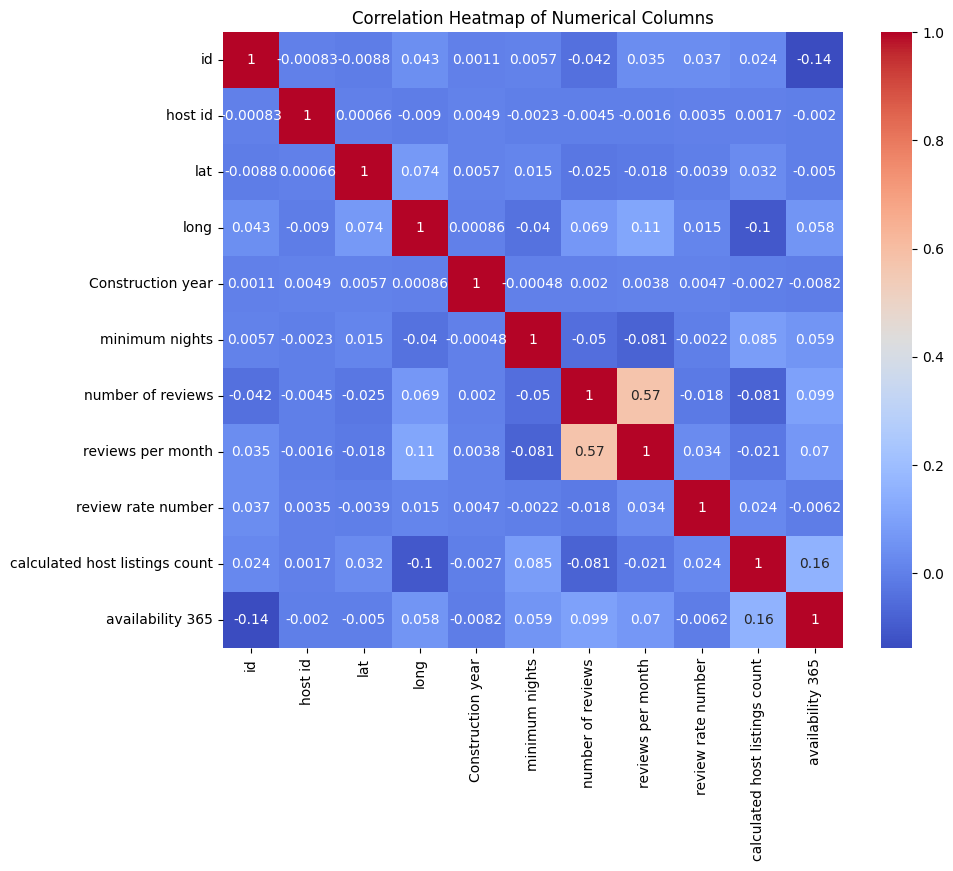

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [68]:
new_data.drop(['id','host id','NAME','host name','neighbourhood group','country code'],axis=1, inplace=True)

<ipython-input-68-7afb01f70da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(['id','host id','NAME','host name','neighbourhood group','country code'],axis=1, inplace=True)


###Separating numerical and categorical values

In [69]:
new_data.head()

,host_identity_verified,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0
1,verified,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0
2,unconfirmed,Harlem,40.80902,-73.94190,United States,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,6/23/2019,1.374022,5.0,1.0,352.0
3,unconfirmed,Clinton Hill,40.68514,-73.95976,United States,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0
4,verified,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0


In [70]:
numerical = new_data.select_dtypes(include = ['int64', 'float64'])
numerical.head()

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,40.64749,-73.97237,2020.0,10.0,9.0,0.210000,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,30.0,45.0,0.380000,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,3.0,0.0,1.374022,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,30.0,270.0,4.640000,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,10.0,9.0,0.100000,3.0,1.0,289.0


<Axes: >

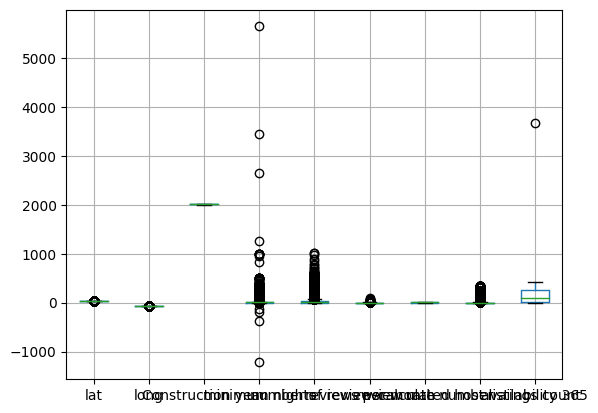

In [71]:
numerical.boxplot()

In [72]:
upper_limit = numerical.quantile(0.75)
lower_limit = numerical.quantile(0.25)

In [73]:
numerical_data = (numerical < upper_limit) & (numerical > lower_limit)

<Axes: >

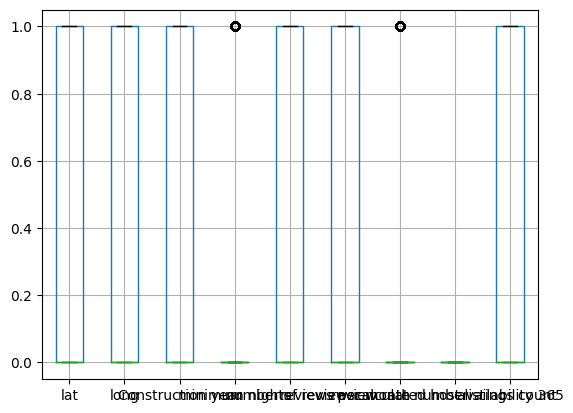

In [74]:
numerical_data.boxplot()

In [75]:
categorical = new_data.select_dtypes(exclude=['int64', 'float64'])
categorical.head()

,host_identity_verified,neighbourhood,country,instant_bookable,cancellation_policy,room type,price,service fee,last review
0,unconfirmed,Kensington,United States,False,strict,Private room,$966,$193,10/19/2021
1,verified,Midtown,United States,False,moderate,Entire home/apt,$142,$28,5/21/2022
2,unconfirmed,Harlem,United States,True,flexible,Private room,$620,$124,6/23/2019
3,unconfirmed,Clinton Hill,United States,True,moderate,Entire home/apt,$368,$74,7/5/2019
4,verified,East Harlem,United States,False,moderate,Entire home/apt,$204,$41,11/19/2018


## Normalization

In [76]:
numerical_columns = numerical.columns.to_list()

In [77]:
new_data[numerical_columns].describe().loc['min':'max']

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
min,40.49979,-74.24984,2003.0,-1223.0,0.0,0.01,1.0,1.0,-10.0
25%,40.68873,-73.98258,2008.0,2.0,1.0,0.28,2.0,1.0,3.0
50%,40.72229,-73.95444,2012.0,3.0,7.0,1.05,3.0,1.0,98.0
75%,40.76276,-73.93235,2017.0,5.0,30.0,1.71,4.0,2.0,268.0
max,40.91697,-73.70522,2022.0,5645.0,1024.0,90.00,5.0,332.0,3677.0


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])

<ipython-input-78-c05308154dfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])


In [79]:
new_data[numerical_columns].describe().loc['min':'max']

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
25%,0.452898,0.490727,0.263158,0.178363,0.000977,0.003000,0.25,0.000000,0.003526
50%,0.533343,0.542397,0.473684,0.178509,0.006836,0.011557,0.50,0.000000,0.029292
75%,0.630351,0.582957,0.736842,0.178800,0.029297,0.018891,0.75,0.003021,0.075400
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000


In [80]:
categorical_columns = categorical.columns.to_list()
new_data[categorical_columns].head()

,host_identity_verified,neighbourhood,country,instant_bookable,cancellation_policy,room type,price,service fee,last review
0,unconfirmed,Kensington,United States,False,strict,Private room,$966,$193,10/19/2021
1,verified,Midtown,United States,False,moderate,Entire home/apt,$142,$28,5/21/2022
2,unconfirmed,Harlem,United States,True,flexible,Private room,$620,$124,6/23/2019
3,unconfirmed,Clinton Hill,United States,True,moderate,Entire home/apt,$368,$74,7/5/2019
4,verified,East Harlem,United States,False,moderate,Entire home/apt,$204,$41,11/19/2018


In [81]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(data[categorical_columns])

encoded_cols = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoder.transform(data[categorical_columns]), columns=encoded_cols, index=data.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
data2 = pd.concat([new_data, encoded_df], axis=1)
data2.drop(columns=categorical_columns, inplace=True)

In [83]:
data2.head(10)

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,host_identity_verified_unconfirmed,...,last review_9/8/2018,last review_9/8/2020,last review_9/8/2021,last review_9/9/2014,last review_9/9/2015,last review_9/9/2016,last review_9/9/2017,last review_9/9/2018,last review_9/9/2020,last review_9/9/2021
0,0.354044,0.509474,0.894737,0.179528,0.008789,0.002222,0.75,0.015106,0.080282,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.608442,0.488542,0.210526,0.182440,0.043945,0.004112,0.75,0.003021,0.064551,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.741239,0.565422,0.105263,0.178509,0.000000,0.015157,1.00,0.000000,0.098183,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444293,0.532628,0.105263,0.182440,0.263672,0.051450,0.75,0.000000,0.090046,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.716046,0.561584,0.315789,0.179528,0.008789,0.001000,0.50,0.000000,0.081096,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.594180,0.504645,0.526316,0.178509,0.072266,0.006445,0.50,0.000000,0.104150,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.448463,0.539606,0.631579,0.184624,0.047852,0.004334,1.00,0.000000,0.063466,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.448463,0.539606,0.315789,0.184624,0.047852,0.004334,1.00,0.000000,0.062110,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.635457,0.486413,0.105263,0.178363,0.419922,0.038449,0.50,0.000000,0.051532,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.723884,0.518912,0.631579,0.178363,0.115234,0.010890,1.00,0.000000,0.104421,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102599 entries, 0 to 102598
Columns: 4104 entries, lat to last review_9/9/2021
dtypes: float64(4104)
memory usage: 3.1 GB


##Exploratory Data Analysis

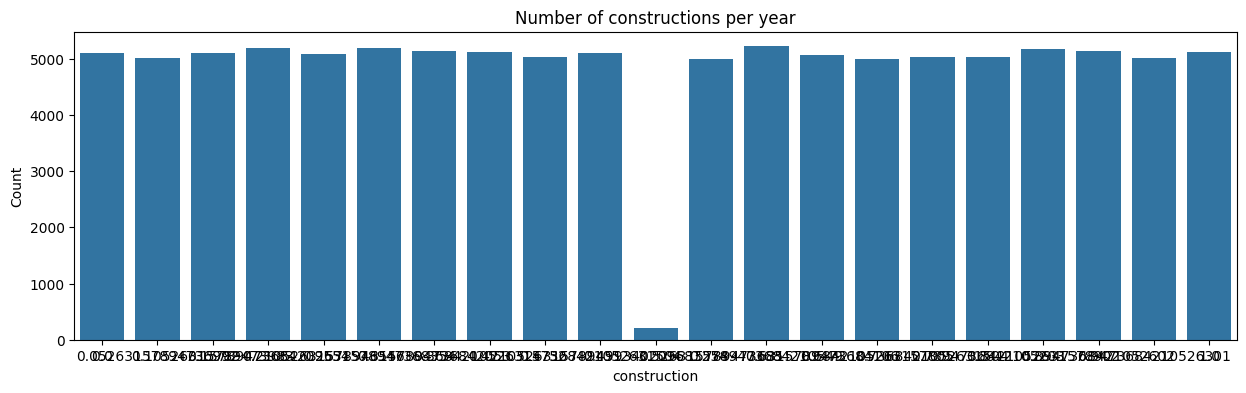

In [85]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Construction year', data=data2)
plt.title('Number of constructions per year')
plt.xlabel('construction')
plt.ylabel('Count')
plt.show()

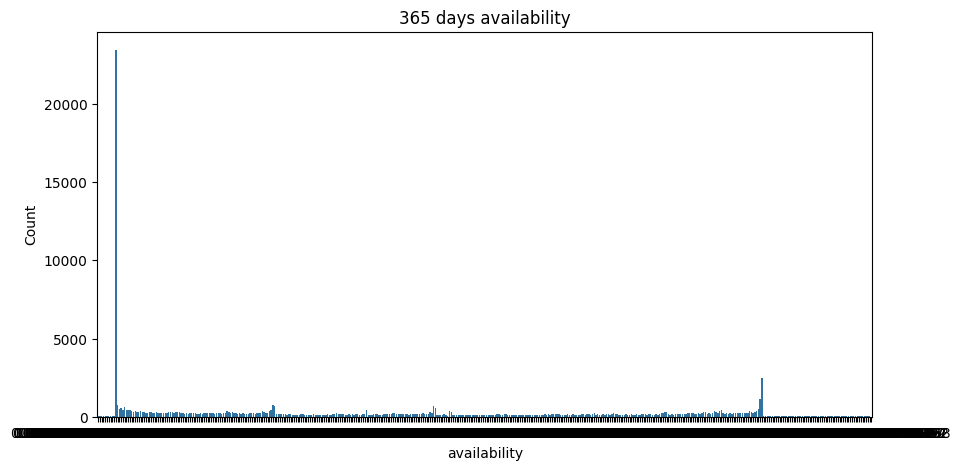

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x='availability 365', data=data2)
plt.title('365 days availability')
plt.xlabel('availability')
plt.ylabel('Count')
plt.show()

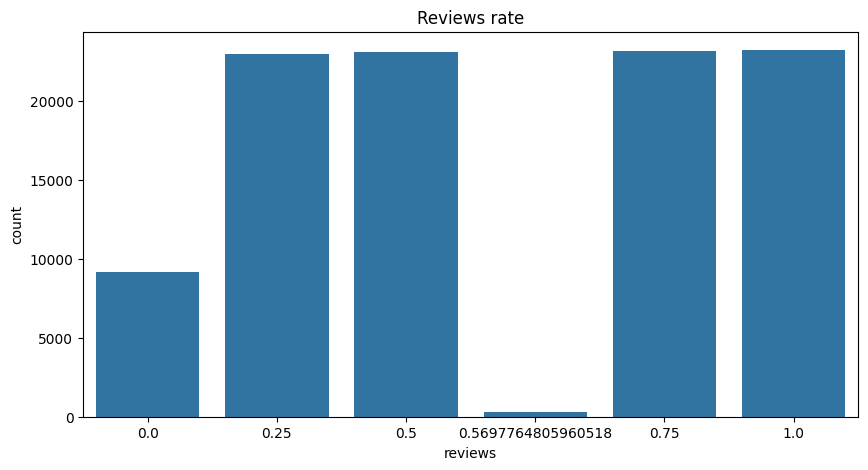

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='review rate number',data=data2)
plt.title('Reviews rate')
plt.xlabel('reviews')
plt.ylabel('count')
plt.show()

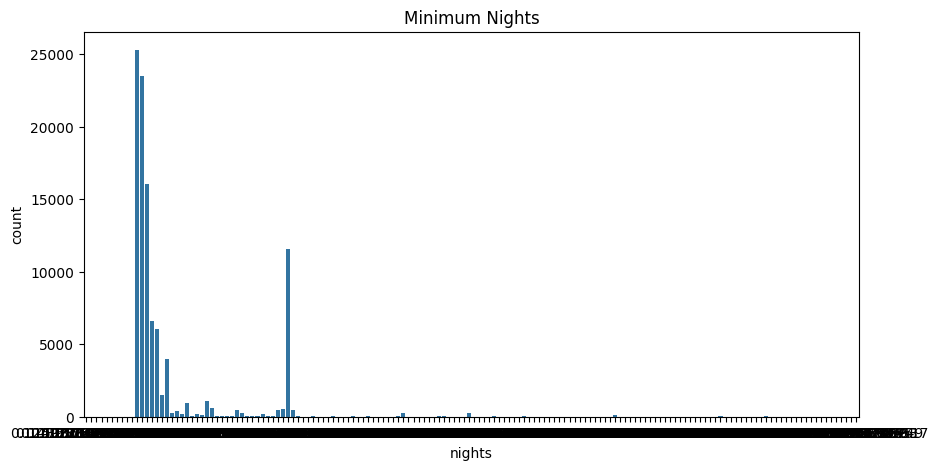

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x='minimum nights',data=data2)
plt.title('Minimum Nights')
plt.xlabel('nights')
plt.ylabel('count')
plt.show()

In [89]:
data2

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,host_identity_verified_unconfirmed,...,last review_9/8/2018,last review_9/8/2020,last review_9/8/2021,last review_9/9/2014,last review_9/9/2015,last review_9/9/2016,last review_9/9/2017,last review_9/9/2018,last review_9/9/2020,last review_9/9/2021
0,0.354044,0.509474,0.894737,0.179528,0.008789,0.002222,0.75,0.015106,0.080282,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.608442,0.488542,0.210526,0.182440,0.043945,0.004112,0.75,0.003021,0.064551,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.741239,0.565422,0.105263,0.178509,0.000000,0.015157,1.00,0.000000,0.098183,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444293,0.532628,0.105263,0.182440,0.263672,0.051450,0.75,0.000000,0.090046,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.716046,0.561584,0.315789,0.179528,0.008789,0.001000,0.50,0.000000,0.081096,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


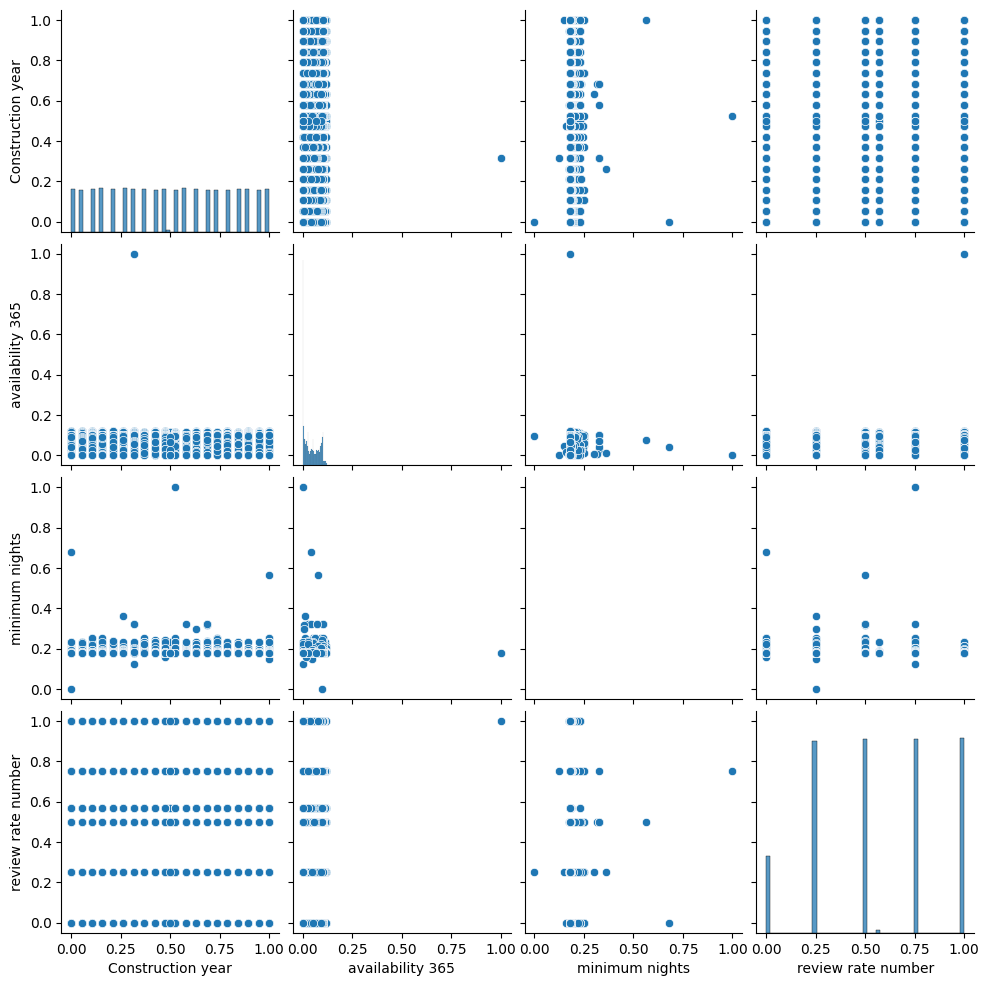

In [90]:
sns.pairplot(data2[['Construction year', 'availability 365', 'minimum nights', 'review rate number']])

<Axes: xlabel='Construction year', ylabel='availability 365'>

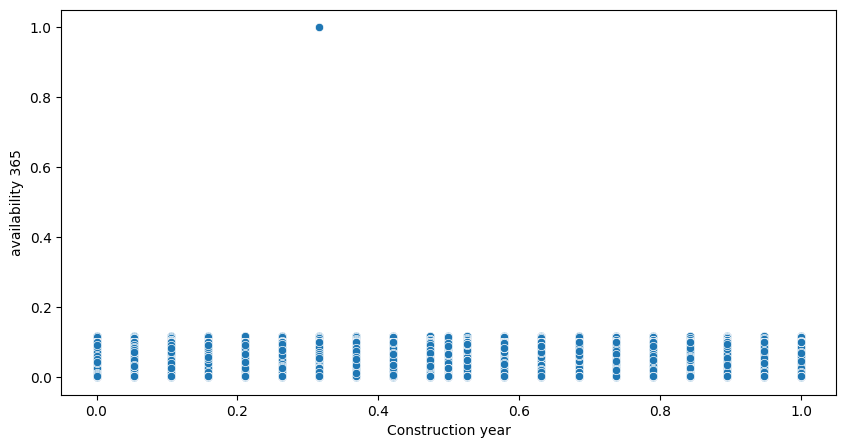

In [91]:
#plot a scatterplot for few columns

plt.figure(figsize=(10,5))
sns.scatterplot(x='Construction year',y='availability 365',data=data2)